# Training

In [19]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
np.shape(x_train)

(60000, 28, 28)

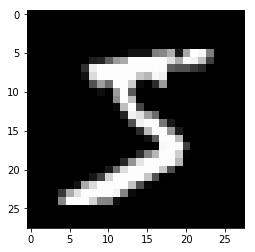

In [21]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
plt.show()

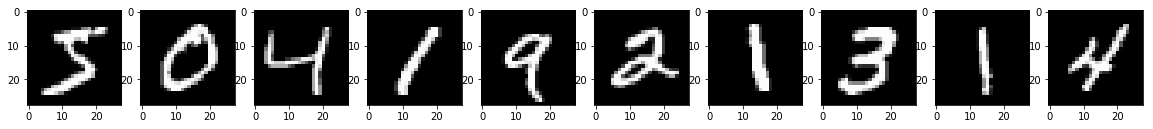

In [22]:
columns = 10
fig = plt.figure(figsize=(20,10))
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_train[i-1])
plt.gray()

In [23]:
print np.shape(y_train)
print y_train[:10]

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [24]:
#-- output 1 if the class label is 1 otherwise 0
y_1_train = [1 if y == 1 else 0 for y in y_train]
print y_1_train[:10]
print '#(1)/#(x_train) = {}'.format(y_1_train.count(1)/float(60000))

[0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
#(1)/#(x_train) = 0.112366666667


In [25]:
x_train_1D = x_train.reshape(60000, 28*28)
np.shape(x_train_1D)

(60000, 784)

In [30]:
x_train_1D[0][:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### [Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/)
1. [Specifying the input shape and NN structure](https://keras.io/getting-started/sequential-model-guide/#specifying-the-input-shape) - create model
 * [layers](https://keras.io/layers/core/)
 * [activations](https://keras.io/activations/#usage-of-activations) - [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)
2. [Compilation](https://keras.io/getting-started/sequential-model-guide/#compilation) - configures the model for training
 * [loss](https://keras.io/losses/)
 * [optimizer](https://keras.io/optimizers/)
 * [metrics](https://keras.io/metrics/)
3. [fit](https://keras.io/getting-started/sequential-model-guide/#training) - trains the model for a dataset with a fixed number of epochs

In [51]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, input_shape=(28*28,), activation='sigmoid'))
model.compile(loss='mse', optimizer='SGD', metrics=['accuracy'])
train_history = model.fit(x=x_train_1D, y=y_1_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0532 - acc: 0.9465
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0185 - acc: 0.9813
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0149 - acc: 0.9850
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0134 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0125 - acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0121 - acc: 0.9878
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0130 - acc: 0.9868
Epoch 8/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0126 - acc: 0.9872
Epoch 9/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0114 - acc: 0.9885
Epoch 10/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0104 - acc: 0.9896

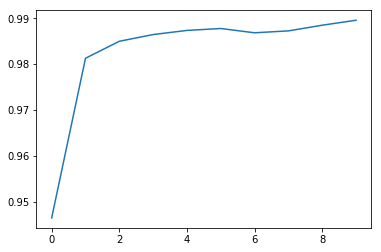

In [52]:
plt.plot(train_history.history['acc'])

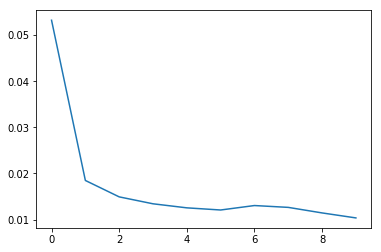

In [53]:
plt.plot(train_history.history['loss'])

# Testing

In [54]:
print x_test.shape
print y_test.shape

(10000, 28, 28)
(10000,)


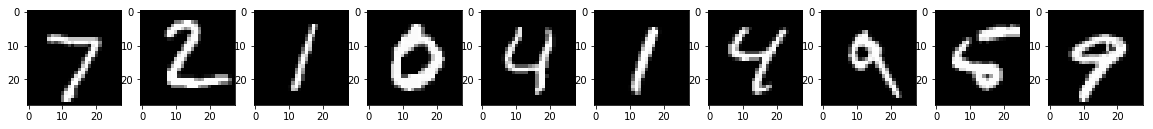

In [55]:
columns = 10
fig = plt.figure(figsize=(20,10))
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_test[i-1])
plt.gray()

In [56]:
x_test_1D = x_test.reshape(10000, 28*28)

In [57]:
#-- output 1 if the class label is 1 otherwise 0
y_1_test = [1 if y == 1 else 0 for y in y_test]
print y_1_test[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]


In [58]:
model.predict_classes(x_test_1D[0:10,:])

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [59]:
model.evaluate(x=x_test_1D, y=y_1_test)

10000/10000 [==============================] - 0s 44us/step


[0.007409376920554797, 0.99229999999999996]